In [1]:
%matplotlib inline

import os
import pickle
import torch

from typing import Tuple, Dict
from d2l import torch as d2l

# Generate Random Data

In [2]:
def generate_random_data(w: torch.Tensor, b: torch.Tensor, num_samples: int) -> Tuple[torch.Tensor, torch.Tensor]:
    """Generate y = Wx + b + noise."""
    X: torch.Tensor = torch.normal(0, 1, (num_samples, len(w)))
    y: torch.Tensor = X @ w + b
    y += torch.normal(0, 1e-2, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w, true_b = torch.tensor([2, -3.4]), torch.tensor([4.2])
features, labels = generate_random_data(true_w, true_b, 1_000)
print(f"features: {features[0]}, label: {labels[0]}")

features: tensor([-0.4049,  1.4279]), label: tensor([-1.4507])


# Save Generated Data

In [4]:
data: Dict[str, torch.Tensor] = {'true_w': true_w, 'true_b': true_b, 'features': features, 'labels': labels}

data_folder: str = os.path.join('..', '..', 'data', 'linreg_data')
os.makedirs(data_folder, exist_ok=True)
with open(os.path.join(data_folder, 'linreg_data.pkl'), 'wb') as f:
    pickle.dump(data, f)

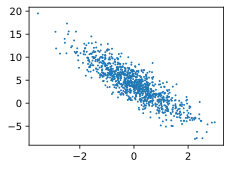

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)